<a href="https://colab.research.google.com/github/dhruvi013/Annual-Rain-Prediction-for-States/blob/main/ARPS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---

# ***START***

## **Data Preprocessing**

In [ ]:
# Import the Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importing the data set
rain_df = pd.read_csv("/content/Monthly_Rainfall_From_1901_to_2017.csv")
rain_df

,Unnamed: 0,States/UTs,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL
0,0,Andaman & Nicobar Islands,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2
1,1,Andaman & Nicobar Islands,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7
2,2,Andaman & Nicobar Islands,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4
3,3,Andaman & Nicobar Islands,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6
4,4,Andaman & Nicobar Islands,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4182,4182,Lakshadweep,2012,19.2,0.1,1.6,76.8,21.2,327.0,231.5,381.2,179.8,145.9,12.4,8.8,1405.5
4183,4183,Lakshadweep,2013,26.2,34.4,37.5,5.3,88.3,426.2,296.4,154.4,180.0,72.8,78.1,26.7,1426.3
4184,4184,Lakshadweep,2014,53.2,16.1,4.4,14.9,57.4,244.1,116.1,466.1,132.2,169.2,59.0,62.3,1395.0
4185,4185,Lakshadweep,2015,2.2,0.5,3.7,87.1,133.1,296.6,257.5,146.4,160.4,165.4,231.0,159.0,1642.9


In [ ]:
# Shape of the Dataset
rain_df.shape

(4187, 16)

In [ ]:
# Viewing First Rows
rain_df.head()

,Unnamed: 0,States/UTs,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL
0,0,Andaman & Nicobar Islands,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2
1,1,Andaman & Nicobar Islands,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7
2,2,Andaman & Nicobar Islands,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4
3,3,Andaman & Nicobar Islands,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6
4,4,Andaman & Nicobar Islands,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7


In [ ]:
# Analysis of the Dataset
rain_df.describe()

,Unnamed: 0,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL
count,4187.000000,4187.000000,4183.000000,4184.000000,4181.000000,4183.000000,4184.000000,4182.000000,4180.000000,4183.000000,4181.000000,4180.000000,4176.000000,4177.000000,4161.000000
mean,2093.000000,1959.206831,18.937772,21.604374,27.395503,43.081712,85.646511,230.047704,347.063780,289.762156,197.311863,95.314713,39.490685,18.934858,1409.370031
std,1208.827117,33.709294,33.797148,35.734572,46.920068,68.156144,122.706290,234.276638,268.867991,188.444169,135.563551,99.204613,68.365883,43.003479,902.693445
min,0.000000,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,62.300000
25%,1046.500000,1930.000000,0.600000,0.500000,1.000000,3.000000,8.600000,70.800000,175.825000,155.800000,100.400000,14.600000,0.600000,0.100000,803.000000
50%,2093.000000,1959.000000,5.900000,6.500000,7.900000,15.500000,36.850000,138.750000,285.050000,258.500000,173.600000,65.100000,9.400000,3.000000,1120.200000
75%,3139.500000,1988.000000,22.000000,26.600000,31.300000,49.700000,97.725000,304.700000,418.525000,377.650000,266.200000,148.300000,45.300000,17.500000,1642.900000
max,4186.000000,2017.000000,583.700000,403.500000,605.600000,595.100000,1168.600000,1609.900000,2362.800000,1664.600000,1222.000000,948.300000,648.900000,617.500000,6331.100000


In [ ]:
rain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4187 entries, 0 to 4186
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  4187 non-null   int64  
 1   States/UTs  4187 non-null   object 
 2   YEAR        4187 non-null   int64  
 3   JAN         4183 non-null   float64
 4   FEB         4184 non-null   float64
 5   MAR         4181 non-null   float64
 6   APR         4183 non-null   float64
 7   MAY         4184 non-null   float64
 8   JUN         4182 non-null   float64
 9   JUL         4180 non-null   float64
 10  AUG         4183 non-null   float64
 11  SEP         4181 non-null   float64
 12  OCT         4180 non-null   float64
 13  NOV         4176 non-null   float64
 14  DEC         4177 non-null   float64
 15  ANNUAL      4161 non-null   float64
dtypes: float64(13), int64(2), object(1)
memory usage: 523.5+ KB


In [ ]:
x_value = rain_df.iloc[0:4187,3:15]
x_value

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6
1,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5
2,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0
3,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1
4,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7
...,...,...,...,...,...,...,...,...,...,...,...,...
4182,19.2,0.1,1.6,76.8,21.2,327.0,231.5,381.2,179.8,145.9,12.4,8.8
4183,26.2,34.4,37.5,5.3,88.3,426.2,296.4,154.4,180.0,72.8,78.1,26.7
4184,53.2,16.1,4.4,14.9,57.4,244.1,116.1,466.1,132.2,169.2,59.0,62.3
4185,2.2,0.5,3.7,87.1,133.1,296.6,257.5,146.4,160.4,165.4,231.0,159.0


In [ ]:
y_value = rain_df.iloc[:, -1].values
y_value

array([3373.2, 3520.7, 2957.4, ..., 1395. , 1642.9, 1065.7])

Data Initialy Normalized which is replaced after selecting the state

In [ ]:
# Replace 'NA' with np.nan
# rain_df.replace("NA", np.nan, inplace=True)

In [ ]:
# month_columns = rain_df.columns[3:]
# month_columns

In [ ]:
# rain_df[month_columns] = rain_df.groupby('States/UTs')[month_columns].transform(lambda x: x.fillna(x.median()))

In [ ]:
# # Check the Data
# rain_df.to_csv('without_NA.csv', index=False)

In [ ]:
# def remove_outliers(group):
#     Q1 = group.quantile(0.25)
#     Q3 = group.quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     return group.apply(lambda x: np.nan if x < lower_bound or x > upper_bound else x)

In [ ]:
# # Apply outlier detection for each state and each month
# rain_df[rain_df.columns[3:]] = rain_df.groupby('States/UTs')[rain_df.columns[3:]].transform(remove_outliers)

# # Fill outliers with the median
# rain_df[rain_df.columns[3:]] = rain_df.groupby('States/UTs')[rain_df.columns[3:]].transform(lambda x: x.fillna(x.median()))

Continuation of code

In [ ]:
result_df = pd.DataFrame(columns=['Algorithm', 'MAE', 'R2'])

In [ ]:
# Appending Each algorithm Mean Absolute Error and R2 score to result_df
def append_results(name, mae, r2):
    global result_df
    new_row = pd.DataFrame({
        'Algorithm': [name],
        'MAE': [mae],
        'R2': [r2]
    })
    result_df = pd.concat([result_df, new_row], ignore_index=True)

In [ ]:
def get_state_names(df, states):

    # Get distinct states
    distinct_names = df[states].drop_duplicates().tolist()

    # Print distinct states  with their indices
    print("Select any State:")
    for index, name in enumerate(distinct_names):
        print(f"{index}: {name}")

    return distinct_names

In [ ]:
state_names = get_state_names(rain_df,'States/UTs')
# state_names

Select any State:
0: Andaman & Nicobar Islands
1: Arunachal Pradesh
2: Assam & Meghalaya
3: Naga Mani Mizo Tripura
4: Sub Himalayan West Bengal & Sikkim
5: Gangetic West Bengal
6: Orissa
7: Jharkhand
8: Bihar
9: East Uttar Pradesh
10: West Uttar Pradesh
11: Uttarakhand
12: Haryana Delhi & Chandigarh
13: Punjab
14: Himachal Pradesh
15: Jammu & Kashmir
16: West Rajasthan
17: East Rajasthan
18: West Madhya Pradesh
19: East Madhya Pradesh
20: Gujarat Region
21: Saurashtra & Kutch
22: Konkan & Goa
23: Madhya Maharashtra
24: Matathwada
25: Vidarbha
26: Chhattisgarh
27: Coastal Andhra Pradesh
28: Telangana
29: Rayalseema
30: Tamil Nadu
31: Coastal Karnataka
32: North Interior Karnataka
33: South Interior Karnataka
34: Kerala
35: Lakshadweep


In [ ]:
ind = int(input("Enter the index of the name you want to select: "))
state = state_names[ind]
print(f"Selected Name: {state}")

Enter the index of the name you want to select: 24
Selected Name: Matathwada


In [ ]:
state_data = rain_df[rain_df['States/UTs'] == state]
state_data = state_data.iloc[:,1:]
state_data

,States/UTs,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL
2785,Matathwada,1901,15.8,3.3,32.1,48.5,26.5,193.1,184.1,249.8,74.0,81.6,0.0,0.0,908.7
2786,Matathwada,1902,1.3,0.0,0.4,7.2,0.8,52.4,120.9,85.2,273.3,61.3,84.4,56.9,744.1
2787,Matathwada,1903,2.6,0.8,0.0,1.7,58.3,104.4,264.2,281.9,173.3,139.9,0.3,5.3,1032.6
2788,Matathwada,1904,0.0,0.9,12.1,0.3,7.2,79.2,118.4,57.3,339.0,76.2,0.0,0.0,690.5
2789,Matathwada,1905,1.3,2.0,0.0,6.6,4.8,84.6,94.8,137.6,157.8,15.4,0.9,0.0,505.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2897,Matathwada,2013,1.5,9.4,2.6,7.9,6.4,160.9,293.4,136.9,154.1,94.3,7.4,13.1,888.0
2898,Matathwada,2014,1.4,13.4,79.0,11.9,7.0,30.4,105.0,178.9,84.5,14.2,19.9,3.3,548.9
2899,Matathwada,2015,10.1,1.6,32.0,39.6,12.3,118.3,27.4,112.2,154.3,19.5,4.8,0.0,532.2
2900,Matathwada,2016,0.0,3.1,10.8,3.0,6.3,157.3,276.1,89.2,302.3,100.8,0.0,0.2,949.0


In [ ]:
# Separating the Features
year = state_data.iloc[0:,1]
monthly_rain = state_data.iloc[0:,2:14]
annual_rain = state_data.iloc[0:,14]

In [ ]:
def manageMissing(df):
    cols = df.columns[2:14]

    for col in cols:
        median_value = df[col].median()
        df[col].fillna(median_value, inplace=True)

    return df

In [ ]:
def manage_outliars(df):

    cols = df.columns[2:14]

    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Replace outliers with median
        median_value = df[col].median()
        df.loc[(df[col] < lower_bound) | (df[col] > upper_bound), col] = median_value

    return df

## **Feature Extraction**

In [ ]:
# Saving to .csv
state_data.to_csv('PreprocessedState.csv', index=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1a2487cbb0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1a2487fe20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1a2487fac0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f1a2487f430>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f1a2487fd60>,
 'means': []}

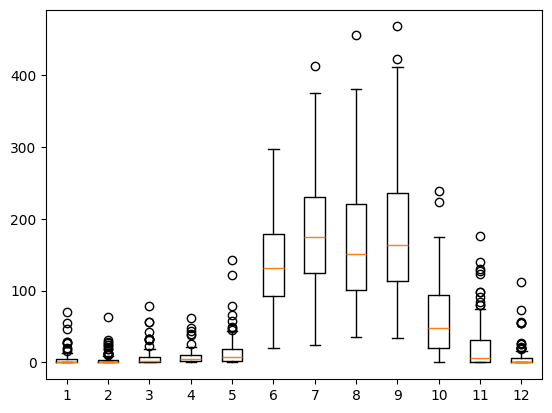

In [ ]:
plt.boxplot(monthly_rain)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1a22f60370>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1a22f608b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1a22f600d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1a22f60df0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1a22f61090>],
 'means': []}

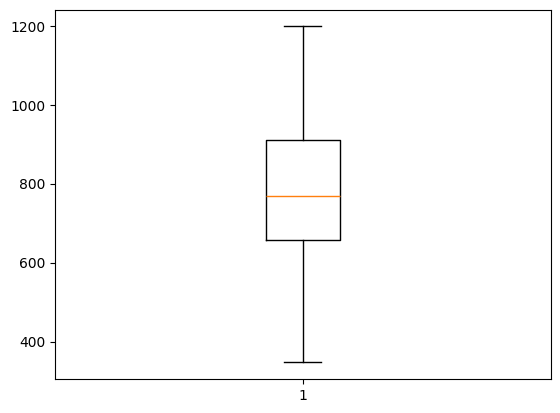

In [ ]:
plt.boxplot(annual_rain)

In [ ]:
state_data = manageMissing(state_data)
state_data = manage_outliars(state_data)

<ipython-input-249-906008a21acf>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)


In [ ]:
# Reassigning the data
monthly_rain = state_data.iloc[0:,2:14]
annual_rain = state_data.iloc[0:,14]

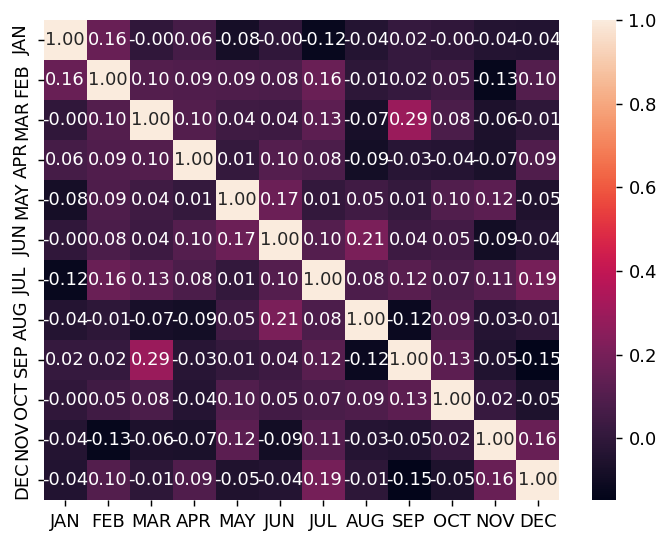

In [ ]:
# corr = monthly_rain.corr()

plt.figure(dpi=130)
sns.heatmap(monthly_rain.corr(), annot=True, fmt= '.2f')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1a25379990>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1a2537a6b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1a2537ad40>,
 'medians': [<matplotlib.lines.Line2D at 0x7f1a25378d60>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f1a2537ada0>,
 'means': []}

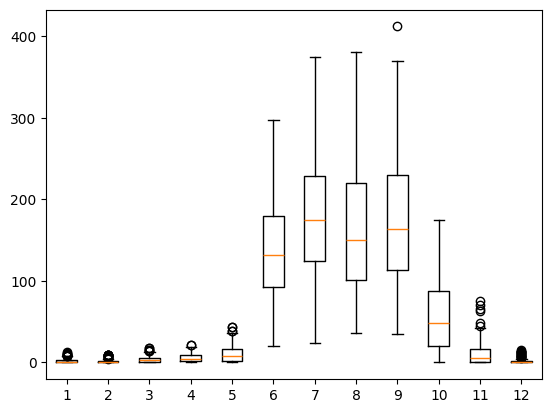

In [ ]:
plt.boxplot(monthly_rain)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1a253ce9b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1a253cee90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1a253cea10>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1a253ccb20>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1a253cdff0>],
 'means': []}

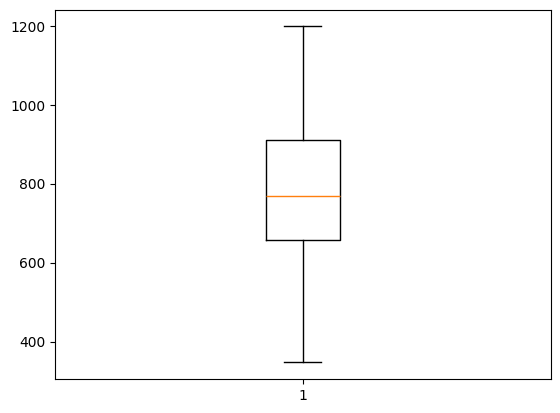

In [ ]:
plt.boxplot(annual_rain)

## **Linear Regression**

In [ ]:
# Extract features (monthly data) and label (annual rainfall)
X = state_data.iloc[:, 2:14].values  # JAN to DEC columns
y = state_data['ANNUAL'].values.reshape(-1, 1) # ANNUAL column

In [ ]:
# Feature normalization
def feature_normalization(x):
    mean = np.mean(x, axis=0)
    std = np.std(x, axis=0)
    x_norm = (x - mean) / std
    return x_norm, mean, std

In [ ]:
X2, mean_X2, std_X2 = feature_normalization(X)

In [ ]:
# # Add bias term to X2
# m = len(X2)
# X2 = np.hstack((np.ones((m, 1)), X2))

In [ ]:
# Hypothesis function
def Hypothesis(theta_array, X):
    return np.dot(X, theta_array)

In [ ]:
# Cost function
def costfunction(theta_array, X, Y, m):
    predictions = Hypothesis(theta_array, X)
    cost = (1 / (2 * m)) * np.sum((predictions - Y) ** 2)
    return cost

In [ ]:
# Gradient descent
def gradient_descent(theta_array, X, Y, m, alpha):
    predictions = Hypothesis(theta_array, X)
    gradients = (1 / m) * X.T @ (predictions - Y)
    theta_array -= alpha * gradients
    return theta_array

In [ ]:
def training(X, Y, alpha, epochs):
    m = len(Y)
    theta_array = np.zeros((X.shape[1], 1))
    cost_values = []

    for i in range(epochs):
        theta_array = gradient_descent(theta_array, X, Y, m, alpha)
        cost = costfunction(theta_array, X, Y, m)
        cost_values.append(cost)


    plt.close()
    # Plot cost function over epochs
    plt.figure(figsize=(10, 6))
    plt.plot(range(epochs), cost_values, color='blue')
    plt.title("Cost Function vs. Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Cost (MSE)")
    plt.grid(True)
    plt.show()

    return theta_array

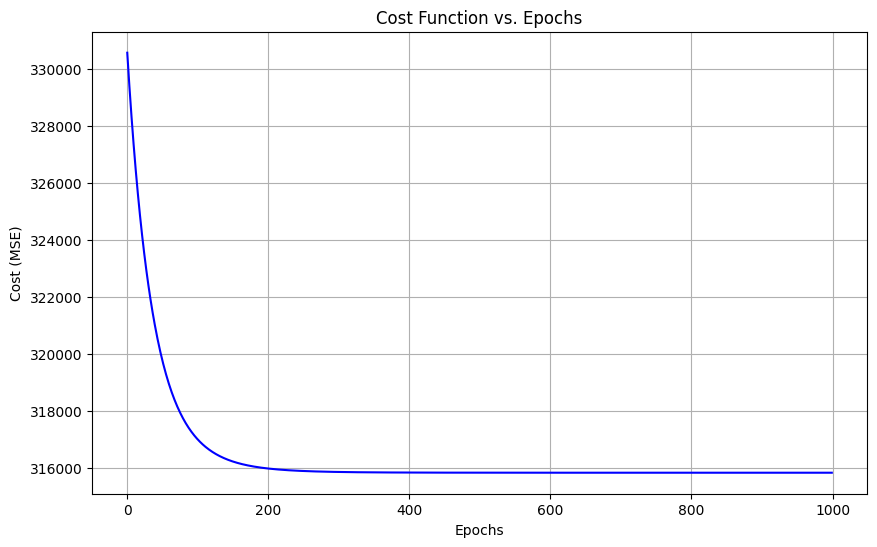

In [ ]:
# Hyperparameters
alpha = 0.01 #Learning Rate
epochs = 1000

# Train the model
theta_array = training(X2, y, alpha, epochs)

In [ ]:
# Display final parameters
print("Learned Parameters (Theta):", theta_array)

Learned Parameters (Theta): [[ 7.41631994]
 [-5.80680231]
 [ 7.65597325]
 [ 2.38266067]
 [10.65781585]
 [57.51532548]
 [76.60332658]
 [78.69006115]
 [78.0845309 ]
 [41.16520056]
 [15.97860867]
 [-0.31944157]]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output model evaluation metrics and parameters
print(f"Mean Squared Error (MSE): {mse}")
print("Mean Absolute Error (MAE):", mae)
print(f"R-squared (R²): {r2}")
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

Mean Squared Error (MSE): 7205.406700814765
Mean Absolute Error (MAE): 59.567997846440825
R-squared (R²): 0.7512024451177559
Coefficients: [[ 0.87555397 -0.55695086  0.28138032  1.21584259  1.05308393  0.95763861
   1.10055418  0.94812815  0.99630177  0.81928077  1.19874534 -0.22111925]]
Intercept: [52.76305377]


In [ ]:
append_results('Linear Regression', mae, r2)

<ipython-input-243-34bad0b22cd6>:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df, new_row], ignore_index=True)


## **Lasso Regression**

**LASSO** (Least Absolute Shrinkage and Selection Operator)

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

In [ ]:
X = state_data.iloc[:, 2:14].values  # JAN to DEC columns
y = state_data['ANNUAL'].values

In [ ]:
# Scaling the Feature
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Training and Splitting
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
lasso_model = Lasso(alpha=0.1)  # here alpha = regularization strength
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.1)

In [ ]:
# prediction and Evaluation
y_pred = lasso_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}, MAE: {mae:.2f}, R²: {r2:.3f}")

MSE: 7220.30, MAE: 59.75, R²: 0.751


In [ ]:
append_results('Lasso Regression', mae, r2)

In [ ]:
# Hyperparameter tuning (Finding Best Alpha)
from sklearn.model_selection import GridSearchCV

lasso = Lasso()
params = {'alpha': [0.01, 0.1, 1, 10, 50, 100]}

grid = GridSearchCV(lasso, param_grid=params, scoring='neg_mean_squared_error', cv=5)
grid.fit(X_train, y_train)

best_alpha = grid.best_params_['alpha']
print(f"Best Alpha: {best_alpha}")

Best Alpha: 1


In [ ]:
# Retaining the best alpha value
lasso_model = Lasso(alpha=best_alpha)
lasso_model.fit(X_train, y_train)

Lasso(alpha=1)

In [ ]:
X_scaled_df = pd.DataFrame(X_scaled, columns=monthly_rain.columns)

In [ ]:
coefficients = lasso_model.coef_
coefficients

array([ 1.57031891, -0.        ,  0.47042354,  5.27577998, 10.74977158,
       54.02429072, 78.00179828, 74.41701711, 81.46269225, 35.19653775,
       18.92194888, -0.        ])

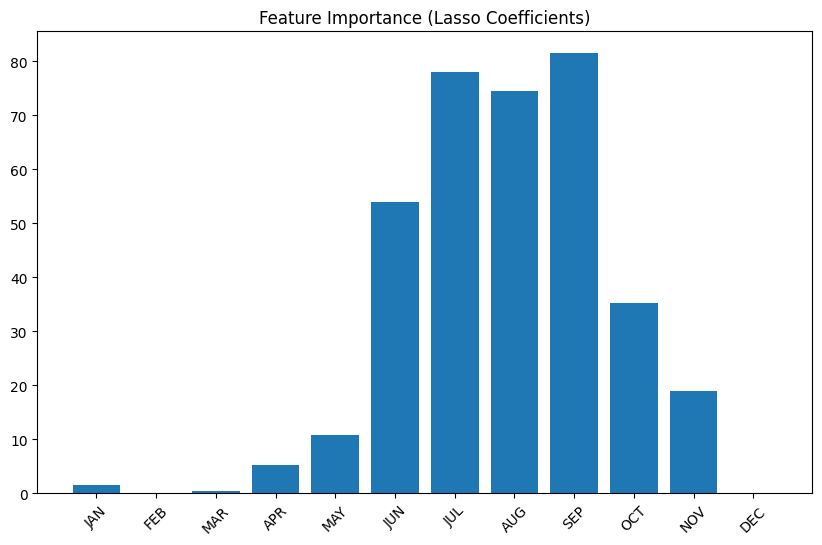

In [ ]:
# Coefficient Analysis
plt.figure(figsize=(10, 6))
plt.bar(X_scaled_df.columns, coefficients)
plt.xticks(rotation=45)
plt.title("Feature Importance (Lasso Coefficients)")
plt.show()

## **Ridge Regression**

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
# Extract features (monthly data) and target (annual rainfall)
X = state_data.iloc[:, 2:14].values  # JAN to DEC columns
y = state_data['ANNUAL'].values

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Train the Ridge regression model with regularization
ridge_model = Ridge(alpha=1.0)  # Adjust alpha for stronger or weaker regularization
ridge_model.fit(X_train, y_train)

Ridge()

In [ ]:
# Predict on the test set
y_pred = ridge_model.predict(X_test)

In [ ]:
# Evaluate the Ridge regression model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
# Output evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 7205.581931699052
Mean Absolute Error (MAE): 59.5701298062556
R-squared (R²): 0.7511963945202864


In [ ]:
append_results('Ridge Regression', mae, r2)

In [ ]:
# Display the model's coefficients
print(f"Coefficients: {ridge_model.coef_}")
print(f"Intercept: {ridge_model.intercept_}")

Coefficients: [ 0.87430726 -0.55526062  0.28128509  1.2154136   1.05294838  0.95764717
  1.10053934  0.9481277   0.99630042  0.81927305  1.19871498 -0.22083153]
Intercept: 52.769550127085154


In [ ]:
# Residual Plot
def plot_residuals(y_test, y_pred):
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, residuals, alpha=0.7, color="blue")
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title("Residual Plot")
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.grid(True)
    plt.show()

In [ ]:
# Actual vs. Predicted
def plot_actual_vs_predicted(y_test, y_pred):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.7, color="green")
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    plt.title("Actual vs. Predicted")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.grid(True)
    plt.show()

In [ ]:
# Coefficient Magnitudes
def plot_coefficients(model, feature_names):
    coefficients = model.coef_
    plt.figure(figsize=(10, 6))
    plt.bar(feature_names, coefficients, color="orange")
    plt.title("Ridge Regression Coefficients")
    plt.xlabel("Features")
    plt.ylabel("Coefficient Magnitude")
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

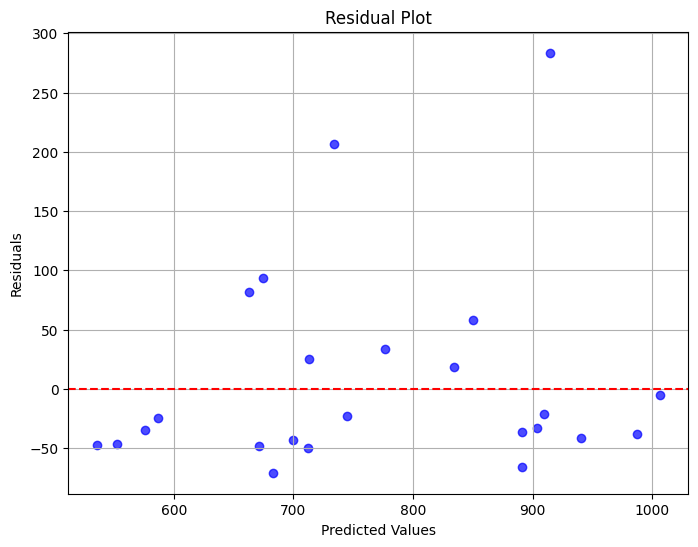

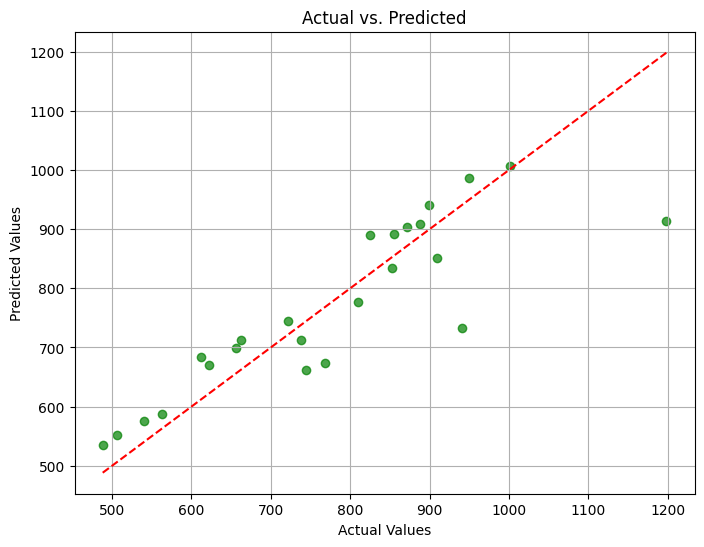

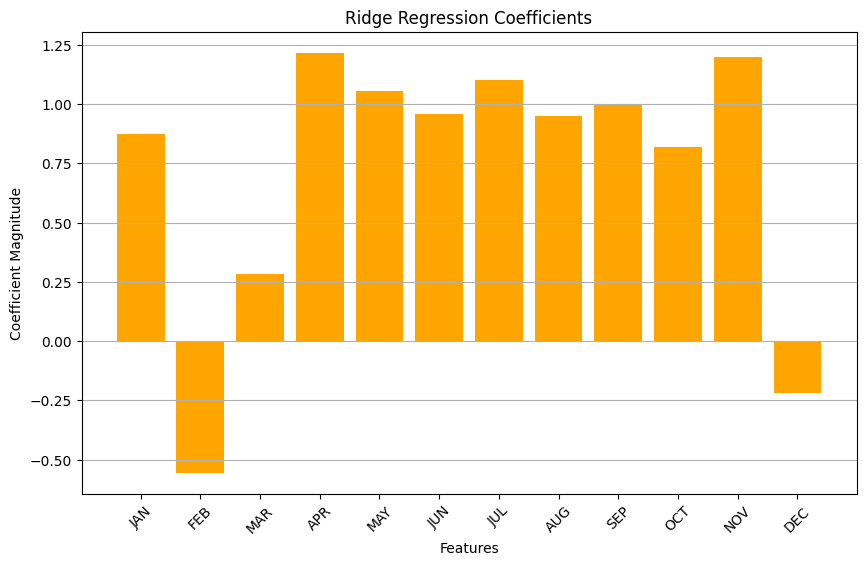

In [ ]:
# Example Usage:
plot_residuals(y_test, y_pred)
plot_actual_vs_predicted(y_test , y_pred)
feature_names = state_data.columns[2:14]  # Assuming columns represent months
plot_coefficients(ridge_model, feature_names)


## **Support Vector Regressor (SVR)**

In [ ]:
from sklearn.svm import SVR

In [ ]:
X = state_data.iloc[:, 2:14].values  # JAN to DEC columns
y = state_data['ANNUAL'].values

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_scaled

array([[-0.4508963 ,  0.70502425, -0.24361336, ...,  0.57948944,
        -0.73357056, -0.57322498],
       [-0.25753698, -0.62218132, -0.75818443, ...,  0.11683679,
        -0.3829818 , -0.35792057],
       [ 0.16140821, -0.30043452, -0.84767506, ...,  1.9081914 ,
        -0.71543666,  0.85316672],
       ...,
       [ 2.57839969,  0.02131229, -0.24361336, ..., -0.83581744,
        -0.44342814, -0.57322498],
       [-0.67648217,  0.62458755,  1.56857173, ...,  1.01707225,
        -0.73357056, -0.51939888],
       [-0.67648217, -0.62218132,  0.20383975, ...,  1.00795594,
        -0.58849935,  0.15342739]])

In [ ]:
# Linear SVR
svr_linear = SVR(kernel='linear', C=100)
svr_linear.fit(X_train, y_train)
y_pred_linear = svr_linear.predict(X_test)
print("Linear Kernel R²:", r2_score(y_test, y_pred_linear))
print("Linear Kernel MSE:", mean_squared_error(y_test, y_pred_linear))
print("Linear Kernel MAE:", mean_absolute_error(y_test, y_pred_linear))

Linear Kernel R²: 0.7284562989543286
Linear Kernel MSE: 7864.1560766325565
Linear Kernel MAE: 56.857838529327275


In [ ]:
append_results('Linear Kernel SVR', mean_absolute_error(y_test, y_pred_linear), r2_score(y_test, y_pred_linear))

In [ ]:
# Polynomial SVR
svr_poly = SVR(kernel='poly', degree=3, C=100)
svr_poly.fit(X_train, y_train)
y_pred_poly = svr_poly.predict(X_test)
print("Polynomial Kernel R²:", r2_score(y_test, y_pred_poly))
print("Polynomial Kernel MSE:", mean_squared_error(y_test, y_pred_poly))
print("Polynomial Kernel MAE:", mean_absolute_error(y_test, y_pred_poly))

Polynomial Kernel R²: 0.5541986732176427
Polynomial Kernel MSE: 12910.817667601417
Polynomial Kernel MAE: 80.42240885000537


In [ ]:
append_results('Polynomial Kernel SVR', mean_absolute_error(y_test, y_pred_poly), r2_score(y_test, y_pred_poly))

In [ ]:
# RBF SVR
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1)
svr_rbf.fit(X_train, y_train)
y_pred_rbf = svr_rbf.predict(X_test)
print("RBF Kernel R²:", r2_score(y_test, y_pred_rbf))
print("RBF Kernel MSE:", mean_squared_error(y_test, y_pred_rbf))
print("RBF Kernel MAE:", mean_absolute_error(y_test, y_pred_rbf))

RBF Kernel R²: 0.5572966393358691
RBF Kernel MSE: 12821.097710997617
RBF Kernel MAE: 85.09643573596895


In [ ]:
append_results('RBF Kernel SVR', mean_absolute_error(y_test, y_pred_rbf), r2_score(y_test, y_pred_rbf))

## **Neural Network**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
# X = state_data.iloc[:, 2:14].values  # JAN to DEC columns
# y = state_data['ANNUAL'].values

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Scale the features for better neural network performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Build the neural network model
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])


In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2, verbose=1)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 637502.5625 - mae: 775.6817 - val_loss: 716418.1875 - val_mae: 819.5402
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 650874.8750 - mae: 785.6115 - val_loss: 715874.2500 - val_mae: 819.2107
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 642264.1875 - mae: 777.4654 - val_loss: 715287.5000 - val_mae: 818.8576
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 626395.2500 - mae: 765.9304 - val_loss: 714648.3125 - val_mae: 818.4728
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 657546.0625 - mae: 791.6758 - val_loss: 713944.1250 - val_mae: 818.0500
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 673024.0625 - mae: 800.2942 - val_loss: 713181.5000 - val_mae: 817.5925
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 669322.7500 - mae: 796.2634 - val_loss: 712316.3750 - val_mae: 817.0737
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 650765.8125 - mae: 783.9607 - val

In [ ]:
# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print the metrics
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

R² Score: 0.7512
Mean Squared Error (MSE): 7205.5819
Mean Absolute Error (MAE): 59.5701


In [ ]:
append_results('Neural Network', mae, r2)

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


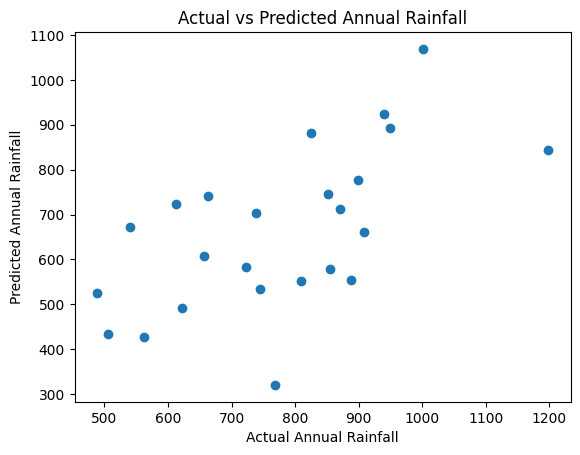

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Annual Rainfall')
plt.ylabel('Predicted Annual Rainfall')
plt.title('Actual vs Predicted Annual Rainfall')
plt.show()

## **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train.ravel())  # ravel to convert y_train to 1D array

RandomForestRegressor(random_state=42)

In [ ]:
# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

In [ ]:
# Calculate Metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regression Metrics:")
print(f"Mean Squared Error (MSE): {mse_rf}")
print(f"Mean Absolute Error (MAE): {mae_rf}")
print(f"R-squared (R²): {r2_rf}")


Random Forest Regression Metrics:
Mean Squared Error (MSE): 15527.846396458326
Mean Absolute Error (MAE): 94.88170833333334
R-squared (R²): 0.4638345375301234


In [ ]:
append_results('Random Forest', mae_rf, r2_rf)

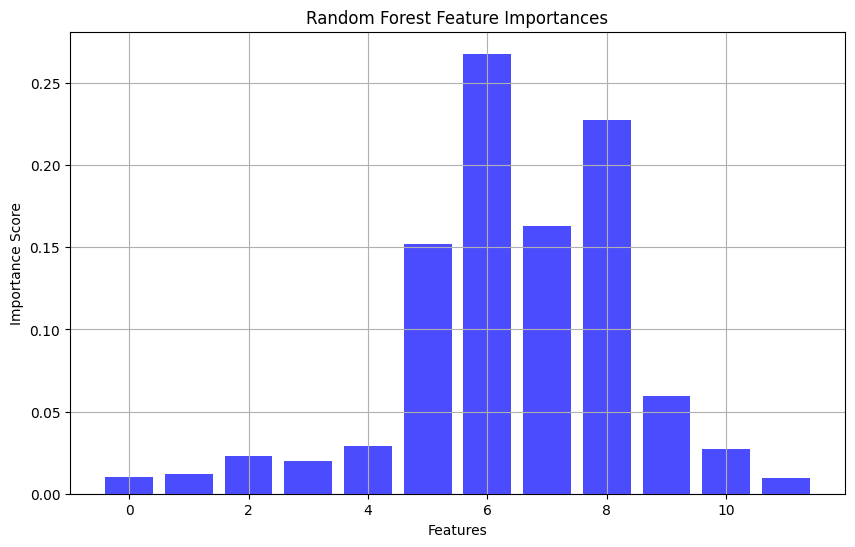

In [ ]:
# Plot Feature Importances
feature_importances = rf_model.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), feature_importances, color='blue', alpha=0.7)
plt.title("Random Forest Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.grid()
plt.show()

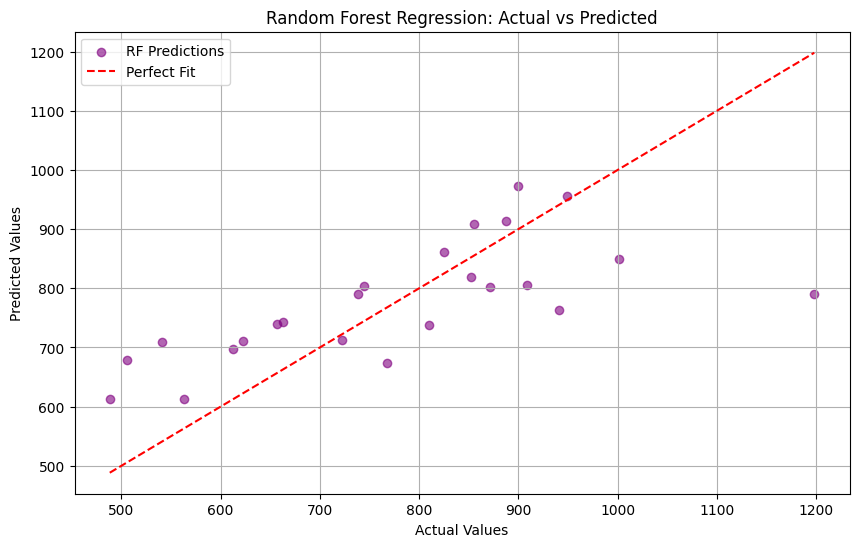

In [ ]:
# Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='purple', alpha=0.6, label='RF Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Fit')
plt.title("Random Forest Regression: Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid()
plt.show()

## **Bagging Regressor**

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Initialize the Bagging Regressor
bagging_model = BaggingRegressor(
    estimator=DecisionTreeRegressor(),  # Base estimator
    n_estimators=50,                    # Number of base models
    random_state=42
)
bagging_model.fit(X_train, y_train.ravel())  # Train the model

BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=50,
                 random_state=42)

In [ ]:
# Predict on the test set
y_pred_bagging = bagging_model.predict(X_test)


In [ ]:
# Calculate Metrics
mse_bagging = mean_squared_error(y_test, y_pred_bagging)
mae_bagging = mean_absolute_error(y_test, y_pred_bagging)
r2_bagging = r2_score(y_test, y_pred_bagging)

print("Bagging Regressor Metrics:")
print(f"Mean Squared Error (MSE): {mse_bagging}")
print(f"Mean Absolute Error (MAE): {mae_bagging}")
print(f"R-squared (R²): {r2_bagging}")

Bagging Regressor Metrics:
Mean Squared Error (MSE): 17696.166433833325
Mean Absolute Error (MAE): 100.40441666666663
R-squared (R²): 0.3889639929652935


In [ ]:
append_results('Bagging Regressor', mae_bagging, r2_bagging)

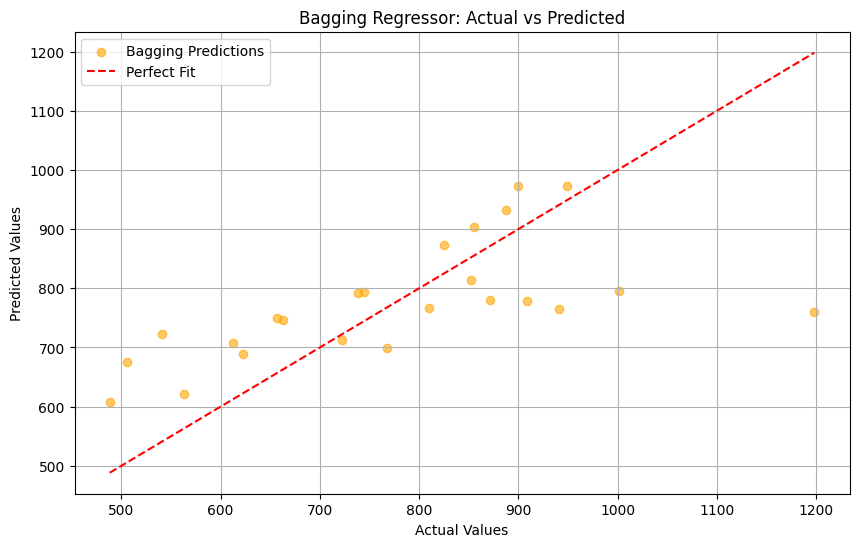

In [ ]:
# Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_bagging, color='orange', alpha=0.6, label='Bagging Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Fit')
plt.title("Bagging Regressor: Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid()
plt.show()

## **Gradient Boosting Regressor**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
# Train-test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize and Train the Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [ ]:
# Make Predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'R-Squared: {r2:.2f}')

Mean Squared Error: 14187.30
Mean Absolute Error: 87.33
R-Squared: 0.51


In [ ]:
append_results('Gradient Boosting Regressor', mae, r2)

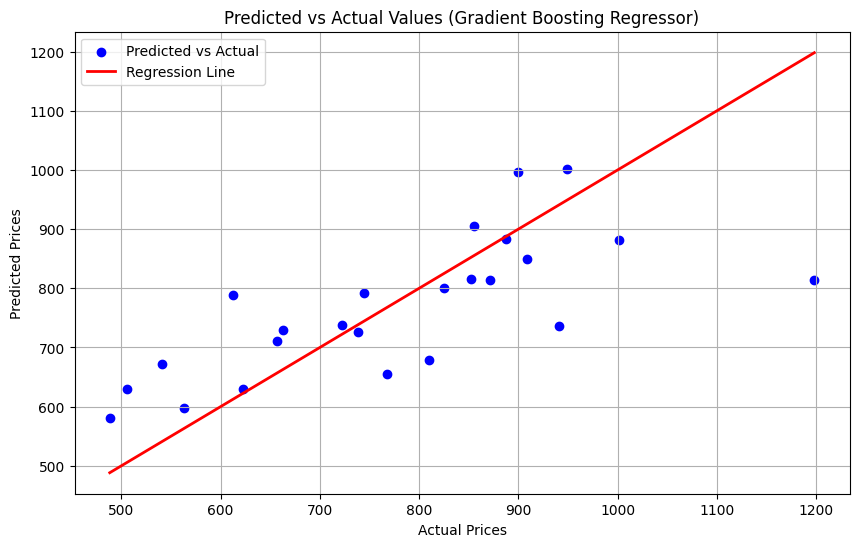

In [ ]:
# Plot Predicted vs Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Regression Line')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual Values (Gradient Boosting Regressor)')
plt.legend()
plt.grid(True)
plt.show()

## **XGBoost**

In [ ]:
pip install xgboost --upgrade

In [ ]:
pip install scikit-learn --upgrade

In [ ]:
from xgboost import XGBRegressor

In [ ]:
# Train-test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize and Train the XGBoost Regressor
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The XGBRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Make Predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'R-Squared: {r2:.2f}')

Mean Squared Error: 12744.72
Mean Absolute Error: 85.44
R-Squared: 0.56


In [ ]:
append_results('XGBoost Regressor', mae, r2)

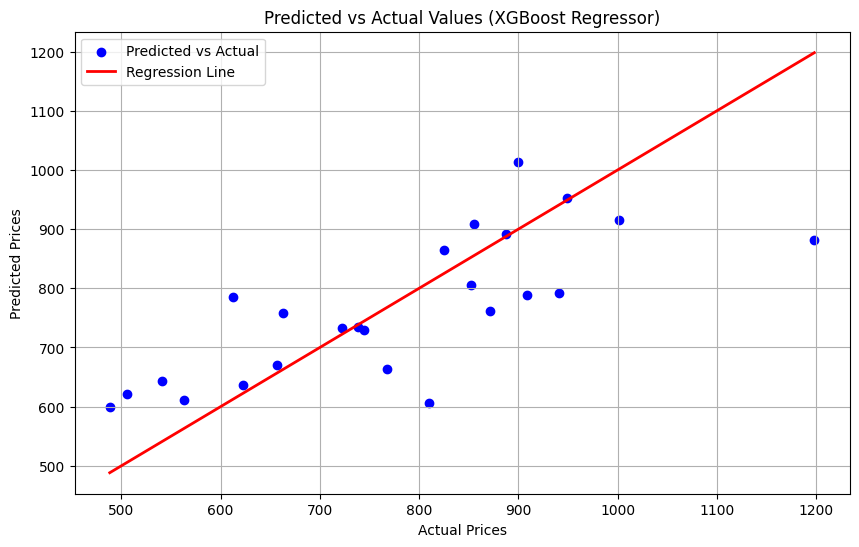

In [ ]:
# Plot Predicted vs Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Regression Line')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual Values (XGBoost Regressor)')
plt.legend()
plt.grid(True)
plt.show()

## **AdaBoost**

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Train-test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize and Train the AdaBoost Regressor
base_model = DecisionTreeRegressor(max_depth=4)
model = AdaBoostRegressor(estimator=base_model, n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=4),
                  learning_rate=0.1, n_estimators=100, random_state=42)

In [ ]:
# Make Predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'R-Squared: {r2:.2f}')

Mean Squared Error: 17936.94
Mean Absolute Error: 100.77
R-Squared: 0.38


In [ ]:
append_results('AdaBoost Regressor', mae, r2)

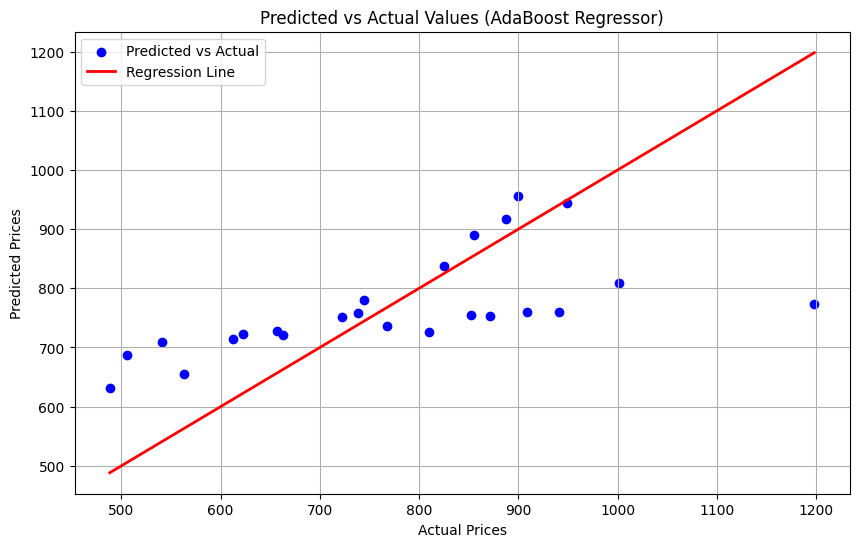

In [ ]:
# Plot Predicted vs Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Regression Line')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual Values (AdaBoost Regressor)')
plt.legend()
plt.grid(True)
plt.show()

## **Elastic Net**

Elastic Net is a type of regularized regression that combines the strengths of Lasso (L1) and Ridge (L2) regression. It’s useful for high-dimensional data and collinear features (when predictors are highly correlated).

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
# Train-test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize and Train Elastic Net
model = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)  # α=0.1, 50% Lasso and 50% Ridge
model.fit(X_train, y_train)

ElasticNet(alpha=0.1, random_state=42)

In [ ]:
# Make Predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'R-Squared: {r2:.2f}')

Mean Squared Error: 7208.29
Mean Absolute Error: 59.60
R-Squared: 0.75


In [ ]:
append_results('Elastic Net ', mae, r2)

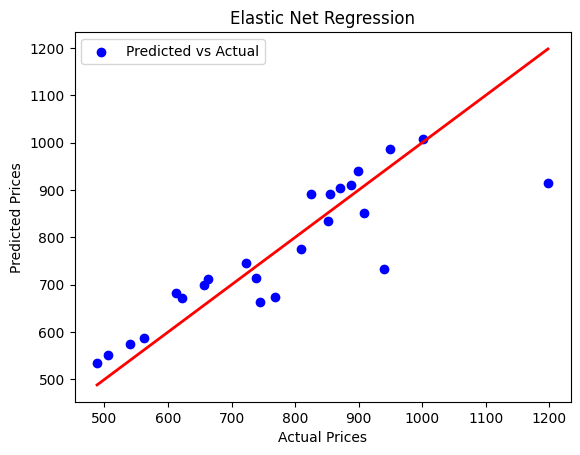

In [ ]:
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Elastic Net Regression')
plt.legend()
plt.show()

# **Final Analysis**

In [ ]:
print(f'For state {state} the Results Obtained From Machine Learning Algorithms are')
result_df

For state Matathwada the Results Obtained From Machine Learning Algorithms are


,Algorithm,MAE,R2
0,Linear Regression,59.567998,0.751202
1,Lasso Regression,59.747598,0.750688
2,Ridge Regression,59.570130,0.751196
3,Linear Kernel SVR,56.857839,0.728456
4,Polynomial Kernel SVR,80.422409,0.554199
5,RBF Kernel SVR,85.096436,0.557297
6,Neural Network,59.570130,0.751196
7,Random Forest,94.881708,0.463835
8,Bagging Regressor,100.404417,0.388964
9,Gradient Boosting Regressor,87.325673,0.510123


# ***END***



---


